# Oasis Infobyte Data Science 
# Task 5: Sales Prediction using Python

Raghav Agarwal  
Dwarkadas J. Sanghvi College of Engineering  
October 2023

## Importing Modules

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [2]:
sales_data = pd.read_csv(r"C:\Users\abhay\OneDrive\Documents\Oasis Infobyte\Task 5\Advertising.csv")

## Preprocessing the data

In [3]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sales_data = sales_data.drop(columns='Unnamed: 0')

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Analysis

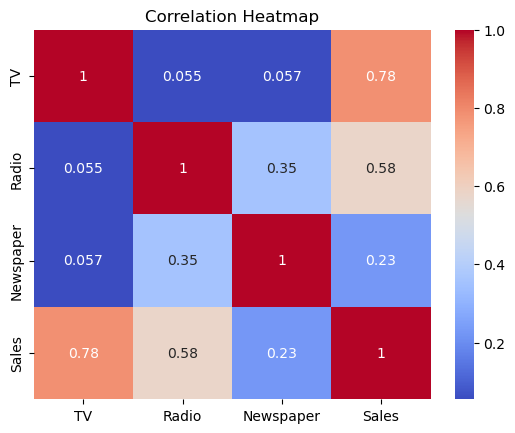

In [6]:
corr_matrix = sales_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap');

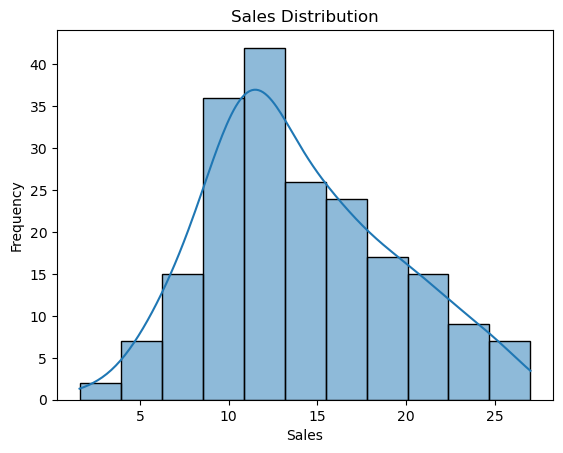

In [7]:
sns.histplot(sales_data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency');

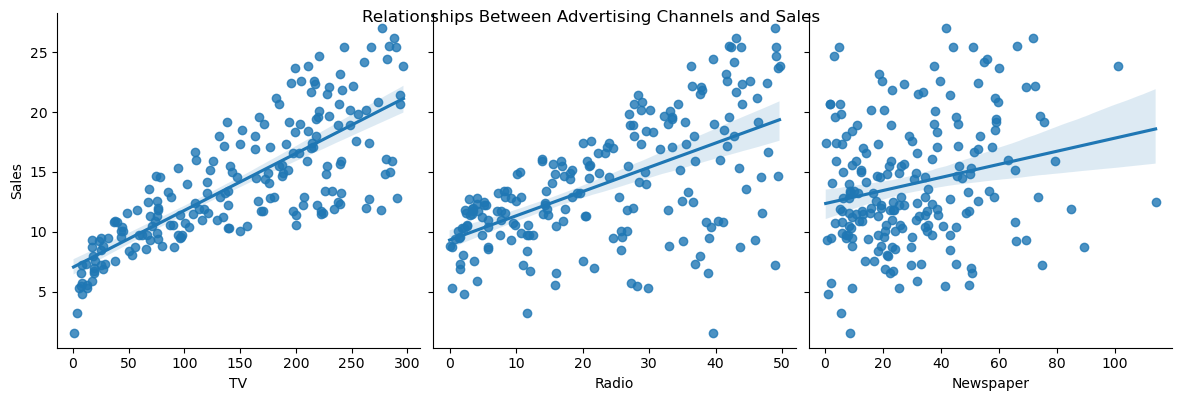

In [8]:
sns.pairplot(sales_data,x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.suptitle('Relationships Between Advertising Channels and Sales');

## Training the Model

In [9]:
X = sales_data.drop(["Sales"], axis=1)
y = sales_data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y.describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [12]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

In [13]:
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

## Evaluating the models

In [14]:
linear_reg_predictions = linear_reg.predict(X_test)
decision_tree_predictions = decision_tree_reg.predict(X_test)
random_forest_predictions = random_forest_reg.predict(X_test)

In [15]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

print("Linear Regression MSE:", linear_reg_mse)
print("Decision Tree MSE:", decision_tree_mse)
print("Random Forest MSE:", random_forest_mse)

Linear Regression MSE: 3.1740973539761046
Decision Tree MSE: 2.192
Random Forest MSE: 0.5299092750000011


In [16]:
r2_linear = r2_score(y_test, linear_reg_predictions)
r2_tree = r2_score(y_test, decision_tree_predictions)
r2_forest = r2_score(y_test, random_forest_predictions)

print("Linear Regression r2 score:", r2_linear)
print("Decision Tree r2 score:", r2_tree)
print("Random Forest r2 score:", r2_forest)

Linear Regression r2 score: 0.899438024100912
Decision Tree r2 score: 0.9305529016321217
Random Forest r2 score: 0.983211377031489


## Comparision of the models

In [17]:
model_names  = ["Linear Regression", "Decision Tree", "Random Forest"]
mse_scores  = [linear_reg_mse, decision_tree_mse, random_forest_mse]
r2_scores = [r2_linear, r2_tree, r2_forest]

results_df = pd.DataFrame({'Model': model_names, 'MSE': mse_scores, 'R-squared': r2_scores})

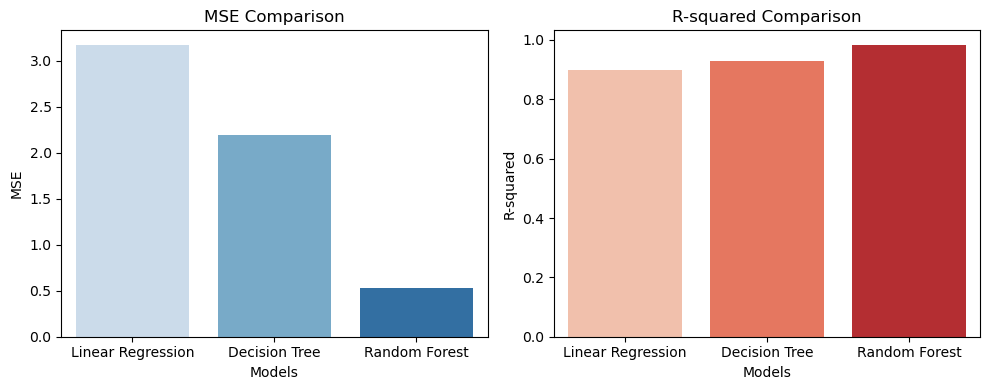

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='Model', y='MSE', palette='Blues')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison')

plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='Model', y='R-squared', palette='Reds')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')

plt.tight_layout();

In [19]:
compare = pd.DataFrame({
    "Sales": y_test,
    "Linear_Regression_Predictions": linear_reg_predictions,
    "Decision_Tree_Predictions": decision_tree_predictions,
    "Random_Forest_Predictions": random_forest_predictions
})

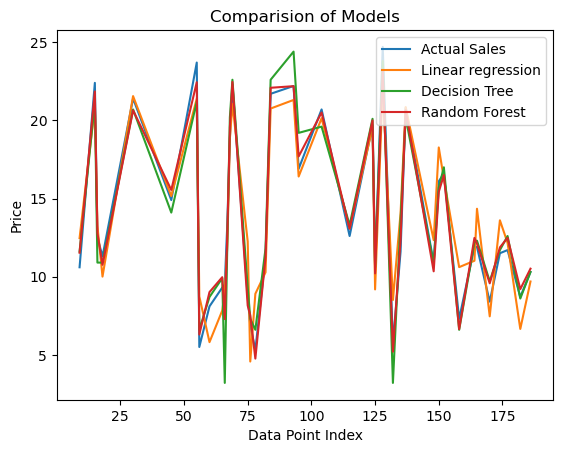

In [20]:
sns.lineplot(data=compare, x=compare.index, y="Sales", label="Actual Sales")
sns.lineplot(data=compare, x=compare.index, y="Linear_Regression_Predictions", label="Linear regression")
sns.lineplot(data=compare, x=compare.index, y="Decision_Tree_Predictions", label="Decision Tree")
sns.lineplot(data=compare, x=compare.index, y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of Models")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend();

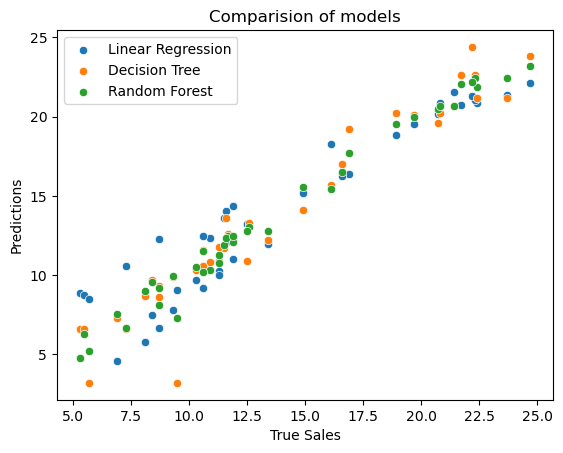

In [21]:
sns.scatterplot(data=compare, x="Sales", y="Linear_Regression_Predictions", label="Linear Regression")
sns.scatterplot(data=compare, x="Sales", y="Decision_Tree_Predictions", label="Decision Tree")
sns.scatterplot(data=compare, x="Sales", y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of models")
plt.xlabel("True Sales")
plt.ylabel("Predictions")
plt.legend();

## Understanding the Random Forest Model

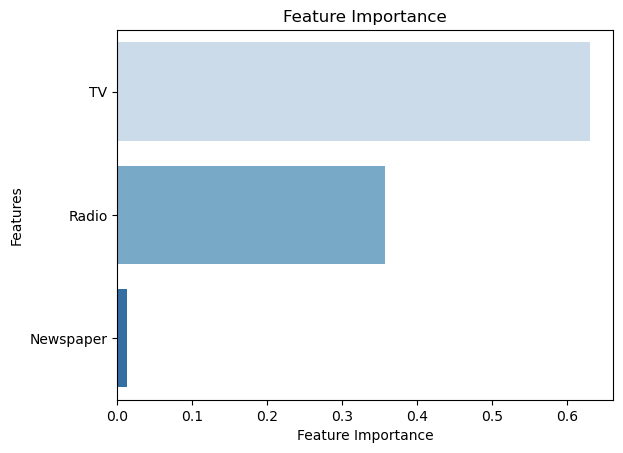

In [22]:
sns.barplot(x=random_forest_reg.feature_importances_, y=X.columns, palette='Blues')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance');

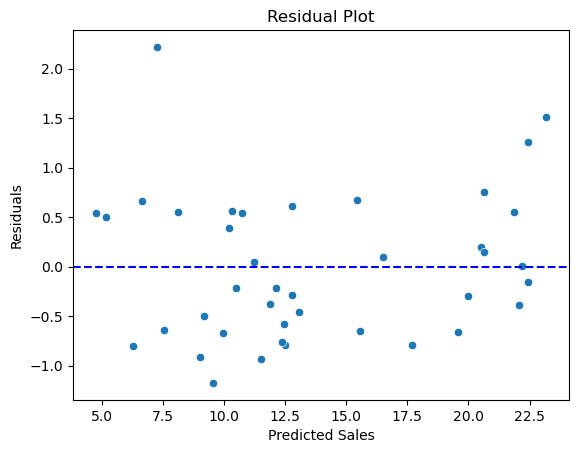

In [23]:
residuals = y_test - random_forest_predictions
sns.scatterplot(x=random_forest_predictions, y=residuals)
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot');

## Conclusion

In this project, we embarked on a comprehensive journey of data exploration, model development, and evaluation. Our initial data exploration revealed key insights into the dataset's characteristics, showcasing the relationships between advertising expenditures in TV, Radio, Newspaper channels, and sales. The subsequent process of training three distinct models, including Linear Regression, Decision Tree, and Random Forest, provided valuable perspectives on their performance. However, the Random Forest model emerged as the most compelling solution, offering a balance of interpretability and robust predictive power. With a considerably lower MSE and effective feature importance analysis, it illuminated the dominant influence of the TV advertising channel on sales. This conclusion underscores the potential of Random Forest as a dependable tool for sales prediction and data-driven marketing decisions.  

Overall, this project has provided invaluable experience in the end-to-end process of working with data, building machine learning models, and preparing for real-world data science challenges.